### I will be using the dataset als_data.csv to apply clustering methods for this assignment. I will complete the following steps during this analysis 

$\bullet$ Remove any data that is not relevant to the patient’s ALS condition. <br>
$\bullet$ 2Apply a standard scalar to the data <br>
$\bullet$ Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster. <br>
$\bullet$ Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice. <br>
$\bullet$ Fit a K-means model to the data with the optimal number of clusters chosen in part (4). <br>
$\bullet$ Fit a PCA transformation with two features to the scaled data. <br>
$\bullet$ Make a scatterplot the PCA transformed data coloring each point by its cluster value. <br>
$\bullet$ Summarize your results and make a conclusion. <br>


In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import yellowbrick


### Load the data as a Pandas data frame and ensure that it imported correctly.

In [2]:
# Load the data
df = pd.read_csv('als_data.csv')
df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [3]:
#Identify variables and it's attributes in the dataset
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Columns: 101 entries, ID to Urine.Ph_min
dtypes: float64(75), int64(26)
memory usage: 1.7 MB


,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,1214.874944,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,...,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,696.678300,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,...,2.715247,0.009283,289923.528450,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,1.000000,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,...,112.000000,0.000000,533.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
25%,614.500000,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,...,135.000000,0.010582,240825.500000,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000
50%,1213.000000,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,...,137.000000,0.013123,496835.000000,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000
75%,1815.500000,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,...,138.000000,0.017278,750300.500000,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000
max,2424.000000,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,...,145.000000,0.142857,999482.000000,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000


In [4]:
# Check any missing values accros columns
df.isnull().any()

ID                 False
Age_mean           False
Albumin_max        False
Albumin_median     False
Albumin_min        False
                   ...  
trunk_min          False
trunk_range        False
Urine.Ph_max       False
Urine.Ph_median    False
Urine.Ph_min       False
Length: 101, dtype: bool

In [5]:
# Display the columns name
df.columns

Index(['ID', 'Age_mean', 'Albumin_max', 'Albumin_median', 'Albumin_min',
       'Albumin_range', 'ALSFRS_slope', 'ALSFRS_Total_max',
       'ALSFRS_Total_median', 'ALSFRS_Total_min',
       ...
       'Sodium_min', 'Sodium_range', 'SubjectID', 'trunk_max', 'trunk_median',
       'trunk_min', 'trunk_range', 'Urine.Ph_max', 'Urine.Ph_median',
       'Urine.Ph_min'],
      dtype='object', length=101)

### Observations
$\bullet$ The dataset has $2223$ rows and $101$ columns <br>
$\bullet$ There is just numerical data <br>
$\bullet$ there is no missing value<br>

# 1. Remove any data that is not relevant to the patient’s ALS condition.

In [6]:
# drop irrelevant columns to the pationt's ALS condition
df.drop(['SubjectID', 'ALSFRS_slope'],axis=1)

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.00,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.00,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.00,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.00,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,35,32.5,30,0.009107,...,141.0,136.0,0.014035,7,5.0,5,0.003643,7.00,6.0,5.0
2219,2420,61,47.0,45.0,42.0,0.009074,31,26.0,17,0.025408,...,143.0,141.0,0.009074,5,4.0,3,0.003630,7.41,5.5,5.0
2220,2421,47,46.0,44.0,41.0,0.012111,26,23.0,20,0.010949,...,141.0,135.0,0.013123,5,4.0,4,0.001825,9.00,6.0,5.0
2221,2422,37,49.0,44.0,39.0,0.017857,34,29.5,21,0.023214,...,139.0,136.0,0.007143,8,4.5,2,0.010714,6.00,5.0,5.0


### Observations
$\bullet$ SubjectID is irrelevant column in this dataset <br>
$\bullet$ ALSFRS_slope is irrelevant column in this dataset. Because I want to make the dataset uniform and neat I drop it  <br>


# 2. Apply a standard scalar to the data.

In [7]:
#Scale the data
from scipy.stats import zscore
df_z = df.apply(zscore)
df_z.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,-1.742767,0.917137,3.089417,-1.300781,-0.866550,5.480929,-0.381450,-0.318520,0.134960,0.247368,...,2.300470,0.260968,-1.719279,1.028018,0.981832,1.715365,-0.997420,-0.880376,0.463054,1.868532
1,-1.741331,-0.574879,-0.622016,-1.112401,-0.553303,-0.347725,-0.310907,0.998995,0.888863,0.130839,...,-0.278144,-0.489913,-1.718879,1.028018,0.981832,0.867032,-0.388669,0.192665,-1.137208,-0.419151
2,-1.739896,-1.452535,0.924415,1.148162,1.326179,-0.507103,-0.299769,-1.447819,-1.975969,-1.150976,...,1.195350,-0.654169,-1.716861,-0.688950,-2.280669,-1.253800,0.398249,-0.880376,-1.137208,-0.419151
3,-1.738460,0.741606,-0.003443,0.017880,0.073191,-0.174361,0.208801,-0.318520,0.285741,0.480425,...,0.458603,-0.272701,-1.712520,-0.688950,0.049689,0.018699,-0.477181,0.192665,0.463054,-0.419151
4,-1.737024,0.741606,-0.003443,0.583021,0.386438,-0.573670,0.456831,0.057913,0.059570,0.014311,...,0.458603,-0.722774,-1.710920,-0.116627,-0.416383,-0.829634,0.300598,-0.880376,-1.137208,-0.419151


In [8]:
from sklearn.preprocessing import StandardScaler
 
#data = df
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
print(scaled_df)

[[-1.74276716  0.91713698  3.08941722 ... -0.88037551  0.46305355
   1.86853157]
 [-1.74133146 -0.57487867 -0.62201561 ...  0.1926645  -1.13720768
  -0.41915124]
 [-1.73989575 -1.45253494  0.92441474 ... -0.88037551 -1.13720768
  -0.41915124]
 ...
 [ 1.7316406  -0.6626443  -0.31272954 ...  2.33874452  0.46305355
  -0.41915124]
 [ 1.73307631 -1.54030057  0.61512867 ... -0.88037551 -1.13720768
  -0.41915124]
 [ 1.73594772 -0.57487867  0.3058426  ... -1.95341552 -1.13720768
  -0.41915124]]


### Observations
$\bullet$ Created an object of the StandardScaler() function to standardize the data values into the standard format. <br>
$\bullet$ Apply the function onto the dataset using the fit_transform() function. <br>

# I will run step3, 4, and 5 at the same time 
### 3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.
### 4. Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.
### 5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).
$\bullet$ Because I would like to the see the differences between Elbow method versus silhouette score, I would rather to calculate optimal value of K in KMeans for both method. <br>
$\bullet$ First, I will calculate k using python, with the Elbow method. <br>
$\bullet$ Second,I will calculate k using python, with the Silhouette score method <br>

In [9]:
# import necessary models
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [10]:
# Building the clustering model and calculating the values of the Distortion and Inertia:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 30)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
  
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [11]:
# Tabulating and Visualizing the results
# Using the different values of Distortion:
for key, val in mapping1.items():
    print(f'{key} : {val}')

2 : 124896.34615514553
3 : 82884.34307688943
4 : 61663.576550075144
5 : 49821.362169984786
6 : 41996.08934717998
7 : 35477.032462574665
8 : 30714.408966536692
9 : 27443.49595297762
10 : 24598.16790243898
11 : 22317.767913875367
12 : 20504.910895662793
13 : 18910.06753383198
14 : 17419.60458685482
15 : 16272.612644000441
16 : 15394.7567794132
17 : 14477.483963051674
18 : 13702.49071264044
19 : 13016.118134314147
20 : 12472.02118223107
21 : 11747.25495291807
22 : 11026.584532712452
23 : 10470.993242712906
24 : 9948.959227076039
25 : 9656.765675424944
26 : 9183.467240197624
27 : 8821.78959163884
28 : 8546.350286443892
29 : 8199.905714918234


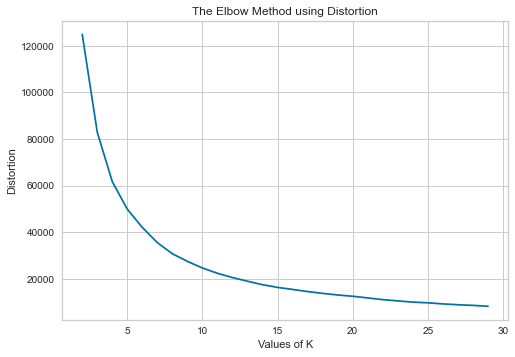

In [12]:
# Visualizing the results
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [13]:
# Using the different values of Inertia:
for key, val in mapping2.items():
    print(f'{key} : {val}')

2 : 46007309041462.26
3 : 20529618202538.504
4 : 11294761089438.254
5 : 7386157512479.001
6 : 5232126676036.502
7 : 3717733696091.915
8 : 2820502328338.328
9 : 2280522015249.208
10 : 1812519512396.72
11 : 1483161119509.6323
12 : 1240413862701.5195
13 : 1053603788170.7307
14 : 903678080917.7417
15 : 792820614172.0074
16 : 703882222964.7168
17 : 623189194398.0858
18 : 558403462223.5186
19 : 503037769613.10925
20 : 459145848487.5317
21 : 406432819333.5938
22 : 366363704483.1007
23 : 330000138628.2105
24 : 298345104743.22314
25 : 280712237756.0531
26 : 253978234162.95618
27 : 233334496261.09406
28 : 221476197537.62143
29 : 204872222768.5354


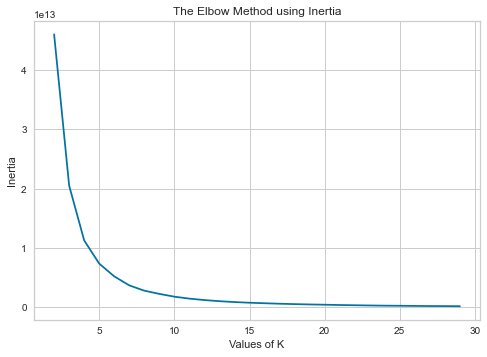

In [14]:
# Visualizing the results
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

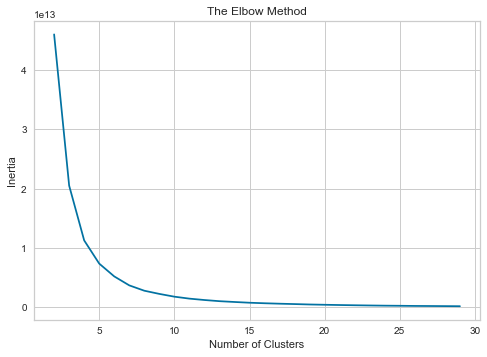

In [15]:
# calculate k using python, with the elbow method
inertia = []

# define our possible k values
possible_K_values = [i for i in range(2,30)]

# I start with 2, as I can not have 0 clusters in k means, and 1 cluster is just a dataset

# iterate through each of our values
for each_value in possible_K_values:
    
    # iterate through, taking each value from 
    model = KMeans(n_clusters=each_value, init='k-means++',random_state=32)
    
    # fit it on the dataframe
    model.fit(df)
    
    # append the inertia to our array
    inertia.append(model.inertia_)

plt.plot(possible_K_values, inertia)
plt.title('The Elbow Method')

plt.xlabel('Number of Clusters')

plt.ylabel('Inertia')
plt.show()

### Observations
$\bullet$ To determine the optimal number of clusters for Elbow method, I have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, I conclude that the optimal number of clusters for the data is 3.<br>
$\bullet$ Above graph reveals 10 as the optimum value of K for Elbow method <br>



### Perform Comparative Analysis to Determine Best Value of K Using Silhouette Plot. Iwill perform Silhouette analysis appropriately to find the most appropriate cluster. In this section, I will use YellowBrick - a machine learning visualization library to draw the silhouette plots and perform

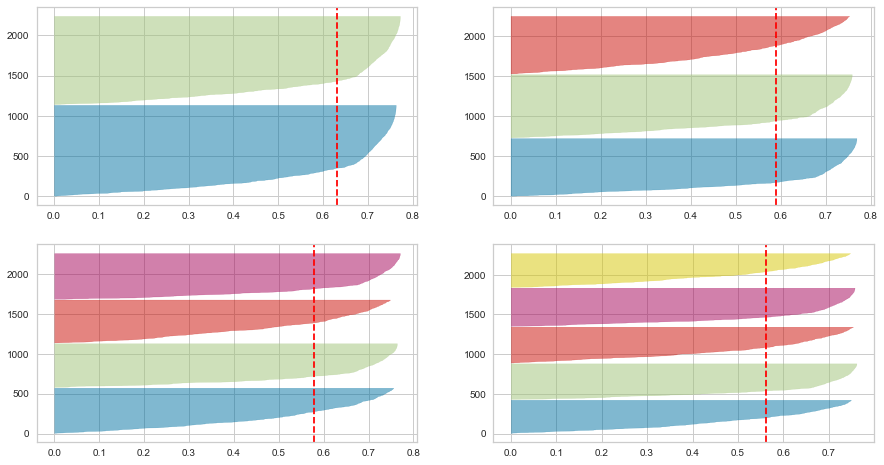

In [16]:
# Create KMeans instance for different number of clusters
#Create SilhouetteVisualizer instance with KMeans instance
#Fit the visualizer
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)

### Observations
### Here is the Silhouette analysis done on the above plots to select an optimal value for n_clusters.
$\bullet$ The value of n_clusters as 3,4, and 5 looks to be suboptimal for the given data and Presence of clusters with below-average silhouette scores. <br> 
$\bullet$ The value of 2 for n_clusters looks to be the optimal one. The silhouette score for cluster 2 is above average silhouette scores. Also, the fluctuation in size is similar. The thickness of the silhouette plot representing the cluster 2 also is a deciding point. Thus, one can select the optimal number of clusters as 2.


In [17]:
from sklearn import datasets
from sklearn.cluster import KMeans

# Instantiate the KMeans models
km = KMeans(n_clusters=2, init='k-means++', random_state=32)
# Fit the KMeans model
km.fit_predict(df)
# Calculate Silhoutte Score
score = silhouette_score(df, km.labels_, metric='euclidean')
# Print the score

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.630


# 6: Fit a PCA transformation with two features to the scaled data.
# 7: Make a scatterplot the PCA transformed data coloring each point by its cluster value.

In [18]:
# Importing necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [20]:
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df)) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,-1.742767,0.917137,3.089417,-1.300781,-0.866550,5.480929,-0.381450,-0.318520,0.134960,0.247368,...,2.300470,0.260968,-1.719279,1.028018,0.981832,1.715365,-0.997420,-0.880376,0.463054,1.868532
1,-1.741331,-0.574879,-0.622016,-1.112401,-0.553303,-0.347725,-0.310907,0.998995,0.888863,0.130839,...,-0.278144,-0.489913,-1.718879,1.028018,0.981832,0.867032,-0.388669,0.192665,-1.137208,-0.419151
2,-1.739896,-1.452535,0.924415,1.148162,1.326179,-0.507103,-0.299769,-1.447819,-1.975969,-1.150976,...,1.195350,-0.654169,-1.716861,-0.688950,-2.280669,-1.253800,0.398249,-0.880376,-1.137208,-0.419151
3,-1.738460,0.741606,-0.003443,0.017880,0.073191,-0.174361,0.208801,-0.318520,0.285741,0.480425,...,0.458603,-0.272701,-1.712520,-0.688950,0.049689,0.018699,-0.477181,0.192665,0.463054,-0.419151
4,-1.737024,0.741606,-0.003443,0.583021,0.386438,-0.573670,0.456831,0.057913,0.059570,0.014311,...,0.458603,-0.722774,-1.710920,-0.116627,-0.416383,-0.829634,0.300598,-0.880376,-1.137208,-0.419151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,1.728769,-1.891363,0.924415,1.901683,1.326179,-0.523480,0.785569,0.622562,0.813473,1.179597,...,-0.278144,-0.103934,1.718963,0.455695,0.049689,0.867032,-0.775847,0.192665,0.463054,-0.419151
2219,1.730205,0.566074,-0.003443,0.394641,0.386438,-0.491855,0.545755,-0.130304,-0.166601,-0.335275,...,1.563723,-0.638454,1.722106,-0.688950,-0.416383,0.018699,-0.778784,0.632611,-0.337077,-0.419151
2220,1.731641,-0.662644,-0.312730,0.017880,0.073191,-0.174361,0.995908,-1.071386,-0.618943,0.014311,...,-0.646518,-0.202174,1.724611,-0.688950,-0.416383,0.442866,-1.179720,2.338745,0.463054,-0.419151
2221,1.733076,-1.540301,0.615129,0.017880,-0.553303,0.426393,-0.205092,0.434346,0.361131,0.130839,...,-0.278144,-0.846582,1.725076,1.028018,-0.183347,-0.405467,0.794913,-0.880376,-1.137208,-0.419151


In [21]:
#Applying PCA
#Taking no. of Principal Components as 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
data_pca.head()

,PC1,PC2
0,-1.406528,-2.310421
1,-1.420097,-4.864377
2,1.637224,-0.424081
3,-1.900213,2.100356
4,0.317648,0.172168


<AxesSubplot:>

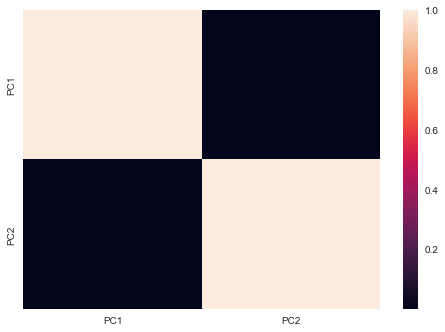

In [22]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())

## Splitting dataset into Train and Test Sets
### Here we are going to separate the dependent label column into y dataframe. And all remaining columns into X dataframe.Then we split them into train and test sets in ration of 70%-30% using train_test_split function of Sklearn.

In [23]:
X = df.drop('Age_mean',axis=1).values
y = df['Age_mean'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [24]:
# Standardizing the Dataset
# apply standardization to both train and test datasets but separately.

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train_pca = scaler.transform(X_train)
X_test_pca = scaler.transform(X_test)

In [25]:
# Standardizing the Dataset
X_Scale = scaler.transform(X)

In [28]:
# applying PCA to concatenate the results back with the class column for better understanding.
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_Scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['Age_mean']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Age_mean
0,-1.481985,-1.479890,65
1,-1.420495,-4.515580,48
2,1.544427,-1.537603,38
3,-1.978685,1.537160,63
4,0.340724,-0.313959,63


Text(0, 0.5, 'pc2')

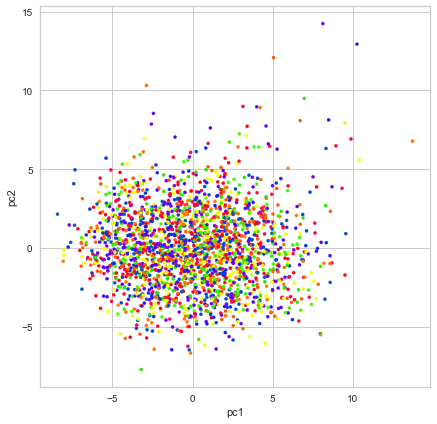

In [27]:
# visualize the dataset that has been reduced to two components with the help of a scatter plot.
plt.figure(figsize=(7,7))
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'],c=finalDf['Age_mean'],cmap='prism', s =10)
plt.xlabel('pc1')
plt.ylabel('pc2')

# Conclusion
### Here is the summary of what I learned in this analysis in relation to silhouette score concepts, find out the optimal number, Fit a PCA transformation with two features, and making a scatterplot the PCA transformed data.
$\bullet$ The silhouette score: 0.630 <br>
$\bullet$ The optimal number of clusters are 2 <br>
$\bullet$ Fit a PCA transformation with two features to the scaled data <br>
$\bullet$ Making the scatterplot the PCA which shows a powerful tool for visualizing clusters in multi-dimensional data. <br> 
$\bullet$ PCA helps us reduce the dimensions of our feature set<br>